# **Neuron Membrane Potential Dynamics**

---

Neurons are considered to be the main information processing unit in the human brain. It's properties has been broadly studied, and multiple mathematical models, ranging from high to poor biollogical plausibility, has been proposed during the years. The Izhikevich model is perhaps the most popular neuron model nowadays, due to its balance between biollogical plausibility and mathematical simplicity, which traduces in good computational performance; and its capability to produce most of firing patterns exhibited by real biological neurons.
<br>
<br>
The Izhikevich model consists of a two-dimensional system of ordinary differential equations:

<img src='https://drive.google.com/uc?id=1O1C4ESrTXbzifOe6m8VQ2a47ZY3X7UqK' width="400" height="80">

With an auxiliary after-spike resetting:

<img src='https://drive.google.com/uc?id=15AtifRkx5BR7m7Bqp3HwpA3YDljsgBbJ' width="350" height="50">

Where $v$ is the membrane potential of the neuron, $u$ is the membrane recovery variable, $'$ implies the time derivative, and $a, b, c, d$ are dimensionless parameters that can be modified to stablish different firing patterns.

The following are the firing modes allowed by the izhikevich model.

<img src='https://drive.google.com/uc?id=12UVONVsc_q_pb6wa5L2J4kZT1ySRsZGy' width="700" height="800">

# **Optimization Task**

---

Faces are critical for social interactions and their recognition constitutes one of the most important and challenging functions of the human brain. Face-selective neural activations in humans have been reported with neuroimaging primarily in the midfusiform gyrus. Yet, the cellular mechanisms producing selective responses to faces in this hominoid neuroanatomical structure remain unknown. Here, we try to approximate the response from the Izhikevich neuron model to single neuron recordings obtained by intracerebral microelectrodes in the face-selective midfusiform gyrus, while the subjects viewed pictures of familiar faces. The optimized simulation of such brain area will allow further understanding of the underlying neuronal mechanisms.

***Boscaglia, Marta (2023). Single-cell recordings in human face-selective cortex. University of Leicester. Dataset.*** https://doi.org/10.25392/leicester.data.23459153.v1

## **Parameters**

---
The parameters that govern the response of the model are:


*   $a$: Describes the time scale of the recovery variable $u$. Smaller values result in slower recovery.
*   $b$: Describes the sensitivity of the recovery variable $u$ to the subthreshold fluctuations of the membrane potential $v$.
*   $c$: Describes the after-spike reset value of the membrane potential $v$ caused by the fast high-threshold $K^+$ conductances.
*   $d$: Describes after-spike reset of the recovery variable $u$ caused by slow high-threshold ${Na}^+$ and $K^+$ conductances.
*   $I$: Is the presynaptic current which holds the information from the previous neuron. As we work with a single neuron, the current I is taken as an additional parameter to be optimized.

Here, initial values for the parameters $a, b, c$ and $d$ are selected to be the typical values of a *regular spiking* neuron, the most typical neuron in the cortex.

## **Objective Function: The Van Rossum Distance**

---
In neuroscience we often want to evaluate, how similar or dissimilar a pair or even large sets of spiketrains are. For this purpose various different spike train dissimilarity measures have been introduced in the literature. The van Rossum metric is used to calculate a distance between two spike trains
(van Rossum 2001). It has been shown to be a good metric in the sense that the
distance between multiple responses to the same stimulus is typically smaller than the distance between responses to different stimuli.
<br>
<br>
To describe the Van Rossum distance it is useful to first define a map from spike trains to functions.

Given a spike train:

$$\mathbf{u} = \{u_1, u_2, ..., u_n\}$$

$$u_n(v) = t \ \forall \ v(\mathbf{x}, t) > 30mV $$

where $v(\mathbf{x}, t)$ is the membrane potential of the neuron at each time $t$ and set of parameters $\mathbf{x}$ ($a, b, c, d$ and $I$).
<br>
<br>
<br>
By filtering $\mathbf{u}$ with a kernel $h(t)$, it is mapped to $f(t; \mathbf{u})$:

$$\mathbf{u} \mapsto f(t; \mathbf{u}) = \displaystyle\sum_{i=1}^{n}h(t - u_i)$$

The causal exponential (van rossum 2001) is used as kernel:

$$h(t) = \begin{cases} 0, & t < 0 \\ e^{-t/\tau}, & t \geq 0 \end{cases}$$

where $\tau$ is the decay constant which parametrizes the metric.
<br>
<br>
The distance between the spike train $\mathbf{u}$ and a spike train $\mathbf{v} = \{v_1, v_2, ..., v_n\}$ is given by:
<br>
<br>
$$
d(\mathbf{u}, \mathbf{v}; \tau) =
\sqrt{\frac{2}{\tau} \int_0^{\infty} \mathrm{d}t \, [f(t; \mathbf{u}) - f(t; \mathbf{v})]^2}
$$
<br>
<br>
<br>
Thus, the optimization task can be expressed as:

$$\displaystyle \min_{a,b,c,d,I \epsilon \mathbb{R}^n} d(\mathbf{a,b,c,d,I})$$  

# **The Non-differentiability Issue**

---



In this task we can find 3 different sources of non-differentiability:


*   Hard threshold for the reset of the membrane potential $v$
*   The event nature of the traditional spikes train
*   High sensitivity of the Van Rossum distance to small parameter changes




# **Non-Smooth Optimization**

---

Non-smooth optimization methods deal with the tas of optimizing functions that are not continuously differentiable. These methods generally fall into 3 main categories:



*   **Subgradient Methods**: At each iteration, a single subgradient is computed and used as descent direction. A subgradient can exist even when the function ins not differentiable at a point, and it can be more than one subgradient of the function at that point. (Convex)
*   **Bundle Methods**: A bundle of subgradients is built from values of past iterations. The information is used to construct a picewise linear approximation of the objective function, and the next search direction is determined by minimizing this approximation. (Convex)
*   **Gradient Sampling Methods**





## **Non-Smooth Optimization - The Gradient Sampling Method**


---

Suitable for solving ***non-smooth***, ***non-convex*** optimization problems. For non-convex functions, subgradient information is meaningful only locally.

The underlying philosophy of the Gradient Sampling method is that virtually any nonsmooth objective function of interest is differentiable almost everywhere. In particular, this is true if the objective function  $f : \mathbb{R}^n \to\mathbb{R}$ is locally Lipschitz continuous. In such case, when $f$ is evaluated at a randomly generated point $x \in \mathbb{R}^n$, it is differentiable there with probability one.

Thus, an algorithm can rely on an ability to obtain $f(x)$ and $\nabla f(x)$, as if $f$ where smooth, rather than requiring to compute a subgradient. In most interesting settings, $f$ is not differentiable at its local minimizers, but under reasonable assumptions, the GS algorithm generate a sequence of iterates where $f$ is differentiable and converge to sationarity.

## **Definitions - Convex Hull**


---

The convex hull of a set of points $x \in \mathbb{R}^n$ is the smaller convex set containing $x$.

## **Definitions - Clarke subdifferential**


---

In the locally Lipschitz case, the Clarke subdifferential of $f$ at $x \in \mathbb{R}^n$ is defined by the convex hull of the limits of gradients of $f$ on sequences converging to $x$:

$$
\bar{\partial} f(x) = \mathrm{conv} \left\{ \lim_{j \to \infty} \nabla f(y^j) : \{y^j\} \to x \text{ where } f \text{ is differentiable at } y^j \text{ for all } j \in \mathbb{N} \right\}.
$$

A point $x$ is Clarke stationary for $f$ if $0 \in \bar{\partial} f(x)$. A more robust sense of stationarity with respect to $f$ can be defined by considering the limits of gradients corresponding to limiting points near $x$; in particular, given a radius $\epsilon \in [0, \infty)$, it can be defined the Clarke $\epsilon$-subdifferential given by

$$
\bar{\partial}_{\epsilon} f(x) = \mathrm{conv} \left\{ \bar{\partial} f(\mathbb{B}(x, \epsilon)) \right\}.
$$

A point $x$ is Clarke $\epsilon$-stationary for $f$ if $0 \in \bar{\partial}_{\epsilon} f(x)$. In practice, one cannot generally evaluate $\bar{\partial} f$ (or $\bar{\partial}_{\epsilon} f$) at (or near) any point where $f$ is not differentiable. The GS algorithm is based on the idea that one can approximate the minimum norm element in $\bar{\partial}_{\epsilon} f(x^k)$ through random sampling of gradients in the ball $\mathbb{B}(x^k, \epsilon)$.

# **The Gradient Sampling Algorithm**


---

<img src='https://drive.google.com/uc?id=1i8hC8YGAdX3wsIG8y-62sayOsq57T3hM' width="580" height="800">

Burke, J. V., Lewis, A. S., & Overton, M. L. (2005). A robust gradient sampling algorithm for nonsmooth, nonconvex optimization. SIAM Journal on Optimization, 15(3), 751–779. https://doi.org/10.1137/030601296

## **Step 1 - Approximating the Clarke $\epsilon$-subdifferential by gradient sampling**


---


*   Randomly select $m$ perturbations $(1 \times n)$ from the normal distribution
*   Convert the perturbations into unitary perturbation vectors multiplied by the ball radius
*   Add the perturbations to $x^k$
*   Build the convex hull by concatenating the gradients

## **Step 2 - Computing the steepest descent direction**


---


*   Solve the QP subproblem to find the minimun norm element of the convex hull
*   Solving the QP subproblem is equivalent to solve $$
\begin{aligned}
\min_{\lambda \in \mathbb{R}^{m+1}} \quad & \frac{1}{2} \left\| G_k \lambda \right\|_2^2 \\
\text{s.t.} \quad & \mathbf{1}^T \lambda = 1, \quad \lambda \geq 0
\end{aligned}
$$
*   If $\|g^k\| \leq \nu_k$ reduce the ball radius by $\epsilon_{k+1} = \mu \epsilon_k$
*   Set step length to 0 and go to next iteration

## **Step 3 - Computing the step length**


---


*   Solve the subproblem using Bactracking Armijo Line Search

<img src='https://drive.google.com/uc?id=1nFxZxzJU9WTEUP5RV6ryWH8w7Qqn-b-I' width="400" height="60">

*   If the algorithm fails to converge, set step length to 0 and go to next iteration

## **Step 4 - Updating parameter vector**


---


# **Adressing the No-Differentiabilities**


---

In practice, the proposed objective function does not fulfill the requirement of being differentiable almost everywhere. To adjust it to such requirement we need to address the 3 main sources of non-differentiability.

## **1. Hard threshold at the membane potential reset**


---

The Izhikevich equations stablish an abrupt change in the potential $v(t)$ at the spike threshold of 30mV. This cause a time lapse where the gradients of the objective functions won't be well defined or will be 0, causing the convex hull $G_k$ to become an ill-conditioned matrix.
<br>
<br>
<img src='https://drive.google.com/uc?id=15AtifRkx5BR7m7Bqp3HwpA3YDljsgBbJ' width="350" height="50">
<br>
<br>
To aovid this issue, the hard threshold can be smoothed by the implementation of a sigmoid function: $$
\sigma(v) = \frac{1}{1 + e^{-sh(v - 30)}}$$ where $sh$ is the sharpness factor defining how pronounced is the slope of the sigmoid. To avoid gradient exploding, the sharpness factor is selected to be $sh = 0.1$


## **2. Event nature of traditional spike trains**


---

In the Neuroscience field, spike trains are usually built to be vectors containing the times $t_i$ where the membrane potential reaches the threshold:
$$u_n(v) = t \ \forall \ v(\mathbf{x}, t) > 30mV $$

This results in a discretization of the membrane potential, which blurs the dependence of $v$ on the parameters. Thus, the gradient path would not be correctly traced.

To solve this, the discrete spike train should be replaced by a contiuously valued spike signal given by:
$$\mathbf{u}_t(v) = \frac{1}{1 + e^{-sh(v_t - 30)}}$$

## **3. Sensitivity of Van Rossum distance**


---

The izhikevich model can respond to small changes in the parameters with very different firing patterns, which can translate in abrupt changes in the distance and make the objective functinon surface very sharped. This also depends on the value chosen for the decay constant $\tau$.

To avoid this, we can replace the replace the common definition of the distance with an equivalent definition based on signal processing.

The convolution between the spike signal $u(t)$ and the kernel $h(t)$ is given by:

$$
u * h =
 \int_{-\infty}^{\infty}  \, h(t) u(t - \tau)\mathrm{d}\tau
$$

And the Van Rossum distance can be computed as:

 $$d(\mathbf{u}, \mathbf{v}) = \sqrt{\sum((v * h) - (u * h))^2}$$

The Van Rossum distance is defined such that the distance between a spike train with 1 spike and an empty spike train is $d(\mathbf{u}, \mathbf{v}) = 1$. For this reason the GS algorithm tends to search points that result in empty spike trains as the objective function is smaller in this case than for other spike configurations. To solve this, an additional normalization of the metric can be done by defining:

$$E_u = \sum(u * h)^2$$

$$E_v = \sum(v * h)^2$$

where E_u and E_v are the energies for the spike signals $u$ and $v$ respectively. Then, the normalized Van Rossum distance is:

$$d(\mathbf{u}, \mathbf{v}) = \sqrt\frac{{\sum((v * h) - (u * h))^2}}{E_u + E_v}$$

# **Code**


---

In [ ]:
# Importing needed libraries
# --- Differentiation
from jax import grad, lax, jit, random, vmap, nn, debug, config
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize as scipy_minimize

# --- Enable float64 data type
config.update("jax_enable_x64", True)

In [ ]:
# --- Optimize memory usage for jax
!XLA_PYTHON_CLIENT_ALLOCATOR=platform

## **Function definitions**


---

In [ ]:
@jit
def neuron_model(y0, args, t0, t1, dt, num_steps, ts, est_spike_train, v_saved, u_saved, iteration_idx):

    ################################################################################
    ### Neuron parameters
    ################################################################################
    # --- Neuron dynamics
    a = args[0] # Time scale of the recovery variable
    b = args[1] # Sensitivity of the recovery variable to subthreshold fluctuations
    c = args[2] # After-spike reset value
    d = args[3] # After-spike reset of recovery variable
    Isyn = args[4] # Presynaptic current

    # --- Unpacking initial values
    v = y0
    u = jnp.multiply(b, v)

    # --- Saving initial values to output vectors
    v_saved = v_saved.at[0].set(v)
    u_saved = u_saved.at[0].set(u)

    # Initial carry state for jax.lax.scan
    initial_carry = (v, u, v_saved, u_saved, est_spike_train)

    def scan_step(carry, time_idx):
        # --- Unpacks current state from carry
        v, u, v_saved, u_saved, est_spike_train = carry

        ################################################################################
        # Izhikevich Neuron Model
        ################################################################################
        # --- Membrane potential dynamics (Euler integration)
        v_next = v + dt * (0.04 * v**2 + 5 * v + 140 - u + Isyn)
        u_next = u + dt * (a * (b * v - u))

        # --- Saving values to output vectors
        v_saved_next = v_saved.at[time_idx].set(v_next)
        u_saved_next = u_saved.at[time_idx].set(u_next)

        # --- Apply reset if spike_condition is true, otherwise keep raw next values
        #spike_condition = (v_next >= 30.0)
        #v_reset = jnp.where(spike_condition, c, v_next)
        #u_reset = jnp.where(spike_condition, u_next + d, u_next)
        v_next = jnp.clip(v_next, -60, 40)
        spike_sigmoid = nn.sigmoid(0.11 * (v_next - 30.0))
        v_next = v_next * (1 - spike_sigmoid) + spike_sigmoid * c
        u_next = u_next + spike_sigmoid * d

        # --- Evaluates if there was a spike
        #spike_time = jnp.where(spike_condition, ts[time_idx], jnp.nan)
        #spike_time = ts[time_idx] * spike_condition
        # --- Saves spike time
        est_spike_train_next = est_spike_train.at[time_idx].set(spike_sigmoid)

        # Return the new carry state for the next iteration
        return (v_next, u_next, v_saved_next, u_saved_next, est_spike_train_next), None # No scan output needed here

    # --- Execute the scan loop
    final_carry, _ = lax.scan(scan_step, initial_carry, iteration_idx)

    # --- Unpacks the final state from carry
    _, _, v_saved_final, u_saved_final, est_spike_train_final = final_carry

    return v_saved_final, u_saved_final, est_spike_train_final

In [ ]:
def mat_to_dict(matobj):

    responsive_units_dict = {}
    for key in matobj.keys():
        if '_' not in key:
            stimulus_dict = {}
            for stim_idx, stimulus in enumerate(matobj[key][0][0][0]['name'][0]):
                stimulus_dict[stimulus[0][:]] = {
                    'description': matobj[key][0][0][0]['description'][0][0][0][:],
                    'data': matobj[key][0][0][0]['data'][0][stim_idx]
                }
            responsive_units_dict[key] = stimulus_dict

    return responsive_units_dict

In [ ]:
def get_experimental_data(neuron='Neuron1', trial=0):

    ################################################################################
    # Loads experimental data
    ################################################################################
    # --- Loads matlab file
    responsive_units_mat = sio.loadmat('ResponsiveUnits2.mat')
    # --- Converts data structure to dict
    responsive_units = mat_to_dict(responsive_units_mat)
    # --- Selects data among available neurons and stimulus
    neuron_response = responsive_units[neuron]['Stimulus1']['data']
    # --- Selects spike train among trials, dropping nan positions
    exp_spike_train = neuron_response[trial, ~np.isnan(neuron_response[trial])]

    return exp_spike_train

In [ ]:
def spike_times_to_signal(spike_train, dt=0.1):

    ################################################################################
    # Converts spike times into a binary vector
    ################################################################################
    # --- Creates time vector
    time_vector = jnp.arange(-100, 500, dt)
    # --- Creates array for the spike signal
    spike_train_signal = jnp.zeros_like(time_vector)
    # --- Search for suitable places to set a spike
    spike_idx = jnp.searchsorted(time_vector, spike_train)
    # --- Makes sure indices are within array shape
    spike_idx = jnp.clip(spike_idx, 0, time_vector.shape[0] - 1)
    # --- Sets spikes on the indices found
    spike_train_signal = spike_train_signal.at[spike_idx].set(1.0)

    return spike_train_signal


In [ ]:
def get_neuron_model_data(x, dt):

    ################################################################################
    # Model output for point x
    ################################################################################
    # --- Set solution parameters
    t0 = -100
    t1= 500
    # --- Set time vector
    num_steps = jnp.divide(jnp.subtract(t1, t0), dt).astype(np.int32)
    ts = jnp.linspace(t0, t1, num_steps)
    # --- Set iteration index array
    iteration_idx = jnp.arange(1, num_steps)
    # --- Output vectors
    est_spike_train = jnp.full(num_steps, 0.0)
    v_saved = jnp.zeros(num_steps)
    u_saved = jnp.zeros(num_steps)
    # --- Initial value for v (membrane potential)
    y0 = -70
    # --- Denormalize point
    x = denormalize_params(x)
    # --- Compute Neuron membrane potential model output
    args = x
    v, u, est_spike_train = neuron_model(y0, args, t0, t1, dt, num_steps, ts,
                                         est_spike_train, v_saved, u_saved, iteration_idx)

    # --- Filters out NaN values from spikes
    #est_spike_train = est_spike_train[~jnp.isnan(est_spike_train)]

    return v, u, est_spike_train

In [ ]:
def sum_exp_pairwise(spike_train1, spike_train2, tau):

    ################################################################################
    # Computes a single summatory term for Van Rossum distance according to its
    # analytical solution
    ################################################################################
    # --- Handles empty spike trains
    if spike_train1.size == 0 or spike_train2.size == 0:
        return 0.0

    # --- Compute pairwise differences between reshaped vectors
    diff_matrix = jnp.abs(spike_train1[:, None] - spike_train2[None, :])

    # --- Applies the exponential kernel
    exp_matrix = jnp.exp(-diff_matrix / tau)

    # --- Sums all elements
    return jnp.sum(exp_matrix)


In [ ]:
def exp_convolution(spike_train, tau, dt, length):

    ################################################################################
    # Computes the convolution with the exponential kernel for a spike train
    ################################################################################
    # --- Sets time vector
    t = jnp.arange(0, 500, dt)
    # --- Defines the exponential kernel
    kernel = jnp.exp(-t / tau)
    # --- Computes the convolution
    convolution = jnp.convolve(spike_train, kernel, mode='full')[:length]

    return convolution

In [ ]:
def van_rossum_distance(exp_spike_train, est_spike_train, tau, dt):

    ################################################################################
    # Calculates the Van Rossum distance between two spike trains
    ################################################################################
    # --- Gets the length of spike train
    length = est_spike_train.shape[0]
    # --- Convolves spike trains (signals) with the kernel
    conv_exp = exp_convolution(exp_spike_train, tau, dt, length)
    conv_est = exp_convolution(est_spike_train, tau, dt, length)
    # --- Difference computation
    diff = jnp.sum(jnp.square(conv_exp - conv_est)) * dt
    # --- Self distance of the experimental spike train (Energy of the signal)
    exp_energy = jnp.sum(jnp.square(conv_exp)) * dt
    # --- Self distance of the estimated spike train (Energy of the signal)
    est_energy = jnp.sum(jnp.square(conv_est)) * dt
    # --- Normalization term
    norm = exp_energy + est_energy + 1e-8
    # --- Squared distance
    distance = jnp.sqrt(jnp.maximum(0.0, diff / norm))

    return distance

In [ ]:
def obj_function(x, exp_spike_train):

    ################################################################################
    # Objective function computation
    ################################################################################
    # --- Set time resolution
    dt = 0.1
    # --- Compute model output
    v, u, est_spike_train = get_neuron_model_data(x, dt)

    # --- Computes the Van Rossum distance between the spike trains
    tau = 10.0
    van_rossum_dist = van_rossum_distance(exp_spike_train, est_spike_train, tau, dt)

    return van_rossum_dist

In [ ]:
def get_initial_params():

    ################################################################################
    # Sets initial values for the parameters
    ################################################################################
    # --- Izhikevich neuron parameters
    a = 0.01 # Time scale of the recovery variable
    b = 0.2 # Sensitivity of the recovery variable to subthreshold fluctuations
    c = -65 # After-spike reset value
    d = 8 # After-spike reset of recovery variable
    Isyn = 30 # Presynaptic current

    x = jnp.array([a, b, c, d, Isyn], dtype=np.float64)

    return x

In [ ]:
def normalize_params(params):

    ################################################################################
    # Maps parameters from their original range to a [0, 1] kind of range
    ################################################################################
    params_min = jnp.array([-0.026, -1, -65, -21, 0])
    params_max = jnp.array([1, 1.5, -45, 8, 80])
    params_range = params_max - params_min
    return (params - params_min) / params_range

def denormalize_params(params_norm):

    ################################################################################
    # Maps parameters from a [0, 1] kind of range back to their original range.
    ################################################################################
    params_min = jnp.array([-0.026, -1, -65, -21, 0])
    params_max = jnp.array([1, 1.5, -45, 8, 80])
    params_range = params_max - params_min
    return params_norm * params_range + params_min

# **Gradient Sampling Method**


---



In [ ]:
################################################################################
# Gradient Sampling Method
################################################################################
# --- Method parameters
m_samples = 25 # Number of samples for gradient n+1
gamma = 0.5 # Bactracking reduction factor
beta = 1e-4 # Armijo parameter
mu = 0.85 # Sampling radius reduction factor
theta = 0.5 # Optimality tolerance reduction factor

# --- Sufficient improvement stop condition
error_tol = 15
# --- Sufficient improvement counter
error_tol_sum = 0

# --- Method initial values
k = 0 # Iteration counter
epsilon_0 = 1
epsilon_k = epsilon_0 # Sampling radius
nu_0 = 0.01
nu_k = nu_0 # Optimality tolerance
key_init = random.PRNGKey(0)
current_key = key_init # Pseudo Random Number Generator key for jax


# --- Initial point
x_0 = get_initial_params()
x_k = x_0
# --- Normalize initial point
x_k = normalize_params(x_k)
# --- Sets number of parameters to optimize
param_dim = x_k.shape[0]
# --- Experimental data loading
exp_spike_train_discrete = get_experimental_data(trial=5)
exp_spike_train_continuous = spike_times_to_signal(exp_spike_train_discrete)
# --- Create vectors to save simulation data
error_vec = jnp.array([])
x_vec = x_k[None, :]

# --- Compiles the gradient of the objective function
g = grad(obj_function)

while True:
    # --- Computes the objective function for the initial parameters
    current_error = obj_function(x_k, exp_spike_train_continuous)
    error_vec = jnp.append(error_vec, current_error)
    print('------> Iteration {}: Error = {}, epsilon = {}, nu = {}'.format(k, current_error, epsilon_k, nu_k))

    # --- If insufficient improvement increments counter
    if current_error >= error_vec[-2]:
        error_tol_sum += 1
    else:
        error_tol_sum = 0

    # --- If insufficient improvement for too much iterations, stops the algorithm
    if error_tol_sum >=  error_tol:
        break

    # --- Manages PRNG key for jax random operations
    key_perturb, key_next = random.split(current_key)
    current_key = key_next

    # Step 1: Approximate the Clarke epsilon-subdifferential by gradient sampling
    ################################################################################
    # --- Samples m_samples*param_dim values from a normal distribution
    random_perturbations = random.normal(key_perturb, (m_samples, param_dim))
    # --- Computes the norm for each m_samples vector
    norm_perturbations = jnp.linalg.norm(random_perturbations, axis=1, keepdims=True)
    # --- Normalize each vector to be a unitary vector in a random direction
    normalized_perturbations = jnp.divide(random_perturbations, (norm_perturbations + 1e-8))
    # --- Find the points in the ball by applying a perturbation to x_k
    sampled_points = jnp.add(x_k, epsilon_k * normalized_perturbations)
    # --- Compute the gradient at current point x_k
    grad_k = g(x_k, exp_spike_train_continuous)
    # --- Compute the gradient at sampled points
    grad_sampled_points = g(sampled_points[0,:], exp_spike_train_continuous)[None, :]
    for i in range(1, m_samples):
        # --- Checks gradient health
        current_gradient = g(sampled_points[i,:], exp_spike_train_continuous)
        if jnp.isnan(jnp.sum(current_gradient)) or (jnp.isinf(jnp.sum(current_gradient))):
            continue
        grad_sampled_points = jnp.concatenate((grad_sampled_points, current_gradient[None, :]), axis=0)
    # --- Concatenate gradients to form the Convex Hull set G_k
    G_k = jnp.concatenate((grad_k[None, :], grad_sampled_points), axis=0)

    # --- Converts JAX array to numpy array so it can be used by scipy QP solver
    G_k_np = np.asarray(G_k)

    # Step 2: Compute the steepest descent direction by solving the QP subproblem
    ################################################################################
    # --- Computes the cuadratic version of G_k
    Q_qp = np.matmul(G_k_np, G_k_np.T)
    # --- Defines the objective function for the QP subproblem
    def qp_obj_function(alpha_vec):
        return np.multiply(0.5, np.matmul(np.matmul(alpha_vec.T, Q_qp), alpha_vec))
    # --- Defines the gradient of the objective function for the QP subproblem
    def qp_grad(alpha_vec):
        return np.matmul(Q_qp, alpha_vec)
    # --- Sets the parameters for the QP solver
    total_samples = G_k_np.shape[0] # x_k + m samples with valid gradients
    constraints = ({'type': 'eq', 'fun': lambda alpha_vec: np.sum(alpha_vec) - 1.0, 'jac': lambda alpha_vec: np.ones_like(alpha_vec)})
    bounds = [(0.0, None)] * total_samples
    alpha_init = np.full(total_samples, np.divide(1.0, total_samples))
    # --- Solve the QP subproblem by using Sequential Least Squares Programming
    qp_result = scipy_minimize(
            qp_obj_function,
            alpha_init,
            method='SLSQP',
            jac=qp_grad,
            bounds=bounds,
            constraints=constraints,
            options={'disp': False, 'maxiter': 1000}
        )

    # --- Checks convergence on the QP subproblem solution
    if not qp_result.success:
        print(f"Warning: QP solver did not converge at iteration {k}. Message: {qp_result.message}")
        # Fallback: if QP fails, use the gradient at current_params
        optimal_alpha = np.zeros_like(alpha_init)
        optimal_alpha[0] = 1.0 # Only use grad_at_current
    else:
        optimal_alpha = qp_result.x

    # --- Compute the steepest descent direction
    g_k = np.matmul(optimal_alpha, G_k_np)
    g_k_norm = np.linalg.norm(g_k)

    # --- Checks stopping criteria
    if g_k_norm <= nu_k:
        # --- Case 1: Approximately stationary. Reduce tolerances and set step_length to 0.
        t_k = 0.0 # Initial step size
        # --- Reduce sampling radius
        epsilon_k *= mu
        # --- Reduce optimality tolerance
        nu_k *= theta
        print(f"||g^k|| <= nu_k. Reducing tolerance for next iteration.")
        # --- Continue to next iteration without updating x_k
        k += 1
        continue
    else:
        # --- Case 2: Not approximately stationary. Keep current tolerances and proceed to line search.
        t_k = 1.0 # Initial step size

    # --- Defines the unitary vector for direction
    d_k = -g_k / g_k_norm

    # Step 3: Compute the step length by solving the Bactracking Armijo Line Search
    ################################################################################
    # --- Iteration counter for Armijo search
    s = 0
    # --- Runs until Armijo condition is met
    while True:
        # --- Calculates a candidate point for the next step
        candidate_next_x = x_k + t_k * d_k
        # --- Computes objective function for candidate point
        candidate_error = obj_function(candidate_next_x, exp_spike_train_continuous)
        # --- Checks Armijo condition
        if candidate_error < current_error - beta * t_k * g_k_norm:
            # --- Condition is satisfied, accepts current t_k as step length
            break
        # --- # Reduces step length by gamma (backtrack)
        t_k *= gamma
        # --- Increments iteration flag
        s += 1
        # --- Checks stop criterion. If too much backtracking steps without convergence.
        if s > 100:
            print(f"Warning: Line search failed to converge at iteration {k}. Breaking. Setting t_k = 0.")
            # --- Takes no step if line search fails for stability
            t_k = 0.0
            # --- Sets candidate to current point, so there is not update
            candidate_next_x = x_k
            break

    # Step 4: Update parameters
    ################################################################################
    # --- Sets next point
    x_k = candidate_next_x
    print(f"Parameters updated at iteration {k}.")
    # --- Saves current point on vector of x
    x_vec = jnp.concatenate((x_vec, x_k[None, :]), axis=0)

    # --- Updates iteration flag
    k += 1

------> Iteration 0: Error = 0.9382141637916801, epsilon = 1, nu = 0.01
||g^k|| <= nu_k. Reducing tolerance for next iteration.
------> Iteration 1: Error = 0.9382141637916801, epsilon = 0.85, nu = 0.005
Parameters updated at iteration 1.
------> Iteration 2: Error = 0.9355037328005538, epsilon = 0.85, nu = 0.005
Parameters updated at iteration 2.
------> Iteration 3: Error = 0.9290306342582692, epsilon = 0.85, nu = 0.005
Parameters updated at iteration 3.
------> Iteration 4: Error = 0.9287210132292341, epsilon = 0.85, nu = 0.005
||g^k|| <= nu_k. Reducing tolerance for next iteration.
------> Iteration 5: Error = 0.9287210132292341, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 5.
------> Iteration 6: Error = 0.9287019234197238, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 6.
------> Iteration 7: Error = 0.9287008519710539, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 7.
------> Iteration 8: Error = 

/tmp/ipython-input-17-984328620.py:92: RuntimeWarning: overflow encountered in matmul
  Q_qp = np.matmul(G_k_np, G_k_np.T)


Parameters updated at iteration 25.
------> Iteration 26: Error = 0.9286964293142874, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 26.
------> Iteration 27: Error = 0.9286964293142873, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 27.
------> Iteration 28: Error = 0.9286964017156715, epsilon = 0.7224999999999999, nu = 0.0025


/tmp/ipython-input-17-984328620.py:95: RuntimeWarning: overflow encountered in matmul
  return np.multiply(0.5, np.matmul(np.matmul(alpha_vec.T, Q_qp), alpha_vec))
/tmp/ipython-input-17-984328620.py:95: RuntimeWarning: invalid value encountered in matmul
  return np.multiply(0.5, np.matmul(np.matmul(alpha_vec.T, Q_qp), alpha_vec))
/tmp/ipython-input-17-984328620.py:98: RuntimeWarning: overflow encountered in matmul
  return np.matmul(Q_qp, alpha_vec)


Parameters updated at iteration 28.
------> Iteration 29: Error = 0.9286963772610887, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 29.
------> Iteration 30: Error = 0.9286963498140776, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 30.
------> Iteration 31: Error = 0.9286963498140776, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 31.
------> Iteration 32: Error = 0.9286963252814896, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 32.
------> Iteration 33: Error = 0.9286962978774503, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 33.
------> Iteration 34: Error = 0.9286962978774503, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 34.
------> Iteration 35: Error = 0.9286962914849601, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 35.
------> Iteration 36: Error = 0.92869628810841, epsilon = 0.72249999

/tmp/ipython-input-17-984328620.py:98: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(Q_qp, alpha_vec)


Parameters updated at iteration 40.
------> Iteration 41: Error = 0.9286932924278842, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 41.
------> Iteration 42: Error = 0.9286910236209268, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 42.
------> Iteration 43: Error = 0.9286909534887323, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 43.
------> Iteration 44: Error = 0.9286908712275782, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 44.
------> Iteration 45: Error = 0.9286908423493182, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 45.
------> Iteration 46: Error = 0.9286908200779731, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 46.
------> Iteration 47: Error = 0.9286908200779729, epsilon = 0.7224999999999999, nu = 0.0025
Parameters updated at iteration 47.
------> Iteration 48: Error = 0.9286907913998513, epsilon = 0.722499

## **Analysis and plotting**


---

In [ ]:
################################################################################
# Prints resulting parameters (optimized)
################################################################################
print(denormalize_params(x_vec[-1]))

[-9.99034334e-02  5.48037864e-02 -7.87851440e+01  2.41561985e+01
 -5.41296795e+01]
[-7.00000000e+01 -7.64293414e+01 -6.66304240e+01 ... -1.27736371e+24
 -1.29012501e+24 -1.30301380e+24]
[-3.83626504e+00 -3.83626504e+00 -3.84051554e+00 ...  1.29012501e+25
  1.30301380e+25  1.31603136e+25]
[False False False ... False False False]


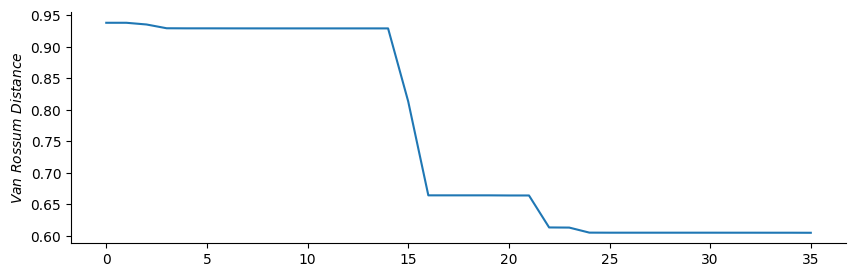

In [ ]:
################################################################################
# Plotting simulation error curve (objective function)
################################################################################
# --- Plot figure
fig1 , ax = plt.subplots(1, 1, figsize=(10, 3))

ax.plot(error_vec)
ax.set(ylabel=r'$Van\ Rossum\ Distance$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

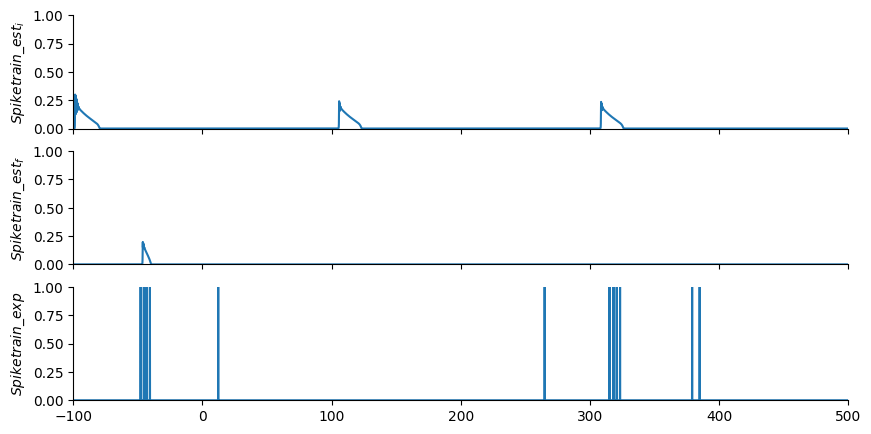

In [ ]:
################################################################################
# Plotting comparison among experimental, initial model and optimized model Calcium
################################################################################
# --- Get model output for initial parameters
v, u, spikes_est_i = get_neuron_model_data(x_vec[0], 0.1)
# --- Get model output for optimized parameters
v, u, spikes_est_f = get_neuron_model_data(x_vec[-1], 0.1)

# --- Plot figures
fig2 , axes = plt.subplots(3, 1, sharex=True,
                        gridspec_kw={'height_ratios': (1, 1, 1)}, figsize=(10, 5))

axes[0].plot(np.arange(-100, 500, 0.1), spikes_est_i)
axes[0].set(xlim=(-100, 500), ylim=[0, 1],
          ylabel=r'$Spike train \_est_i$')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[1].plot(np.arange(-100, 500, 0.1), spikes_est_f)
axes[1].set(xlim=(-100, 500), ylim=[0, 1],
          ylabel=r'$Spike train \_est_f$')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[2].plot(np.arange(-100, 500, 0.1), exp_spike_train_continuous)
axes[2].set(xlim=(-100, 500), ylim=[0, 1],
          ylabel=r'$Spike train \_exp$')
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)


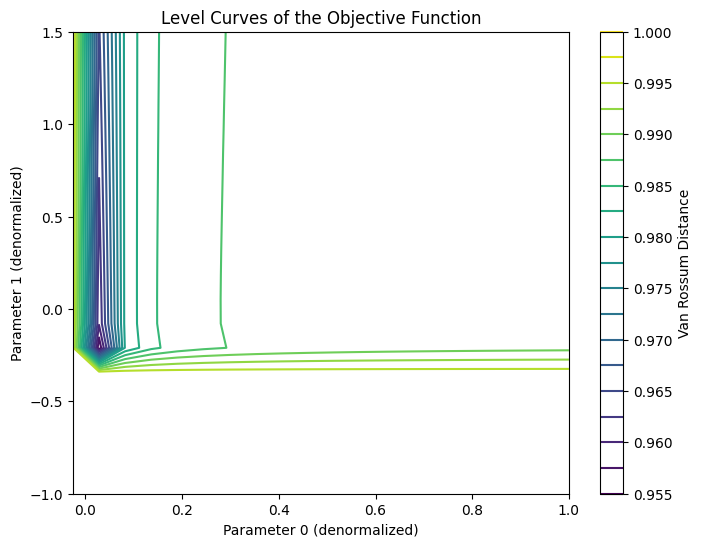

In [ ]:
# Define the range for the two parameters to visualize
param1_idx = 0 # Index for parameter 'a'
param2_idx = 1 # Index for parameter 'b'

param1_range = jnp.linspace(-0.026, 1, 20) # Range for parameter 'a' (denormalized)
param2_range = jnp.linspace(-1, 1.5, 20) # Range for parameter 'b' (denormalized)

# Create a grid of parameter values
param1_grid, param2_grid = jnp.meshgrid(param1_range, param2_range)

# Get the initial parameters
initial_params = get_initial_params()
# Keep the experimental spike train data
exp_spike_train_discrete = get_experimental_data(trial=5)
exp_spike_train_continuous = spike_times_to_signal(exp_spike_train_discrete)

# Evaluate the objective function for each point in the grid
objective_values = jnp.zeros_like(param1_grid)

for i in range(param1_grid.shape[0]):
    for j in range(param1_grid.shape[1]):
        # Create a parameter vector with the current grid values for param1 and param2,
        # and initial values for the other parameters
        current_params = initial_params.at[param1_idx].set(param1_grid[i, j])
        current_params = current_params.at[param2_idx].set(param2_grid[i, j])

        # Normalize the parameters before passing to the objective function
        current_params_norm = normalize_params(current_params)

        # Evaluate the objective function
        objective_values = objective_values.at[i, j].set(obj_function(current_params_norm, exp_spike_train_continuous))

# Plot the level curves
plt.figure(figsize=(8, 6))
contour = plt.contour(param1_grid, param2_grid, objective_values, levels=20, cmap='viridis')
plt.colorbar(contour, label='Van Rossum Distance')
plt.xlabel(f'Parameter {param1_idx} (denormalized)')
plt.ylabel(f'Parameter {param2_idx} (denormalized)')
plt.title('Level Curves of the Objective Function')
plt.show()

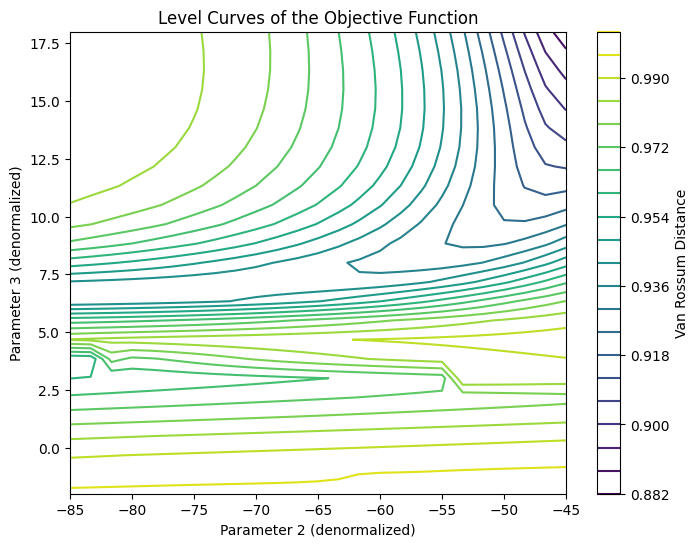

In [ ]:
# Define the range for the two parameters to visualize
param1_idx = 2 # Index for parameter 'c'
param2_idx = 3 # Index for parameter 'd'

# Get the initial parameters to determine the range for plotting
initial_params = get_initial_params()
initial_params_denorm = denormalize_params(normalize_params(initial_params)) # Get denormalized initial params

# Define reasonable ranges for the selected parameters based on the initial values and general knowledge
# You might need to adjust these ranges based on your specific problem
param1_range = jnp.linspace(initial_params_denorm[param1_idx] - 20, initial_params_denorm[param1_idx] + 20, 25) # Range for parameter 'c'
param2_range = jnp.linspace(initial_params_denorm[param2_idx] - 10, initial_params_denorm[param2_idx] + 10, 25) # Range for parameter 'd'


# Create a grid of parameter values
param1_grid, param2_grid = jnp.meshgrid(param1_range, param2_range)

# Keep the experimental spike train data
exp_spike_train_discrete = get_experimental_data(trial=5)
exp_spike_train_continuous = spike_times_to_signal(exp_spike_train_discrete)

# Evaluate the objective function for each point in the grid
objective_values = jnp.zeros_like(param1_grid)

for i in range(param1_grid.shape[0]):
    for j in range(param1_grid.shape[1]):
        # Create a parameter vector with the current grid values for param1 and param2,
        # and initial values for the other parameters
        current_params = initial_params.at[param1_idx].set(param1_grid[i, j])
        current_params = current_params.at[param2_idx].set(param2_grid[i, j])

        # Normalize the parameters before passing to the objective function
        current_params_norm = normalize_params(current_params)

        # Evaluate the objective function
        objective_values = objective_values.at[i, j].set(obj_function(current_params_norm, exp_spike_train_continuous))

# Plot the level curves
plt.figure(figsize=(8, 6))
contour = plt.contour(param1_grid, param2_grid, objective_values, levels=20, cmap='viridis')
plt.colorbar(contour, label='Van Rossum Distance')
plt.xlabel(f'Parameter {param1_idx} (denormalized)')
plt.ylabel(f'Parameter {param2_idx} (denormalized)')
plt.title('Level Curves of the Objective Function')
plt.show()